In [11]:
import os
import datetime
import pytz

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from scipy.signal import find_peaks

In [12]:
def is_gzip_file(filepath):
    with open(filepath, 'rb') as f:
        return f.read(2) == b'\x1f\x8b'

In [13]:
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False

In [20]:
csv_path = tf.keras.utils.get_file(
    origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/data_2_filled.csv.tar.gz')
csv_path

3393974/3393974 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


'C:\\Users\\ASUS\\.keras\\datasets\\data_2_filled.csv.tar.gz'

In [21]:
if is_gzip_file(csv_path):
  # Read the data directly into a pandas DataFrame
  df = pd.read_csv(csv_path, compression='gzip')
else:
  # Read the data without compression
  df = pd.read_csv(csv_path)

row_count = df.shape[0]
print(f"Total rows: {row_count}")

# Rename the first column to 'new_name'
df = df.rename(columns={df.columns[0]: 'datetime'})

# Optional: Print the new column names to verify
print(df.columns)

df.head(5)

Total rows: 138240
Index(['datetime', 'current_power', 'current_value_of_consumption',
       'external_energy_supply', 'grid_feed_in', 'internal_power_supply',
       'self_consumption', 'temperature_measurement', 'total_irradiation'],
      dtype='object')


,datetime,current_power,current_value_of_consumption,external_energy_supply,grid_feed_in,internal_power_supply,self_consumption,temperature_measurement,total_irradiation
0,2021-11-06 11:15:00,177801.977273,14956.522727,NaN,162845.454545,14956.522727,14956.522727,53.204545,793.363636
1,2021-11-06 11:30:00,183561.340659,14892.769231,NaN,168668.571429,14892.769231,14892.769231,57.417582,826.571429
2,2021-11-06 11:45:00,181748.943820,13049.617978,NaN,168699.325843,13049.617978,13049.617978,59.022472,813.269663
3,2021-11-06 12:00:00,183752.505495,14638.659341,NaN,169113.846154,14638.659341,14638.659341,57.241758,828.505495
4,2021-11-06 12:15:00,185546.112360,14776.224719,NaN,170769.887640,14776.224719,14776.224719,54.707865,838.966292


In [22]:
if df.get('datetime') is not None:
    # Ensure timestamp column is datetime type
    if df.index.dtype != 'datetime64[ns]':
        df.index = pd.to_datetime(df['datetime'])
        df.pop('datetime')
        
    print(df.index.year.unique())
    print(df.index.year.value_counts())

Index([2021.0, 2022.0, 2023.0, 2024.0, 2025.0, nan], dtype='float64', name='datetime')
datetime
2024.0    35136
2023.0    35040
2022.0    35040
2025.0    27691
2021.0     5331
Name: count, dtype: int64


In [23]:
all_cols = df.columns
all_cols

Index(['current_power', 'current_value_of_consumption',
       'external_energy_supply', 'grid_feed_in', 'internal_power_supply',
       'self_consumption', 'temperature_measurement', 'total_irradiation'],
      dtype='object')

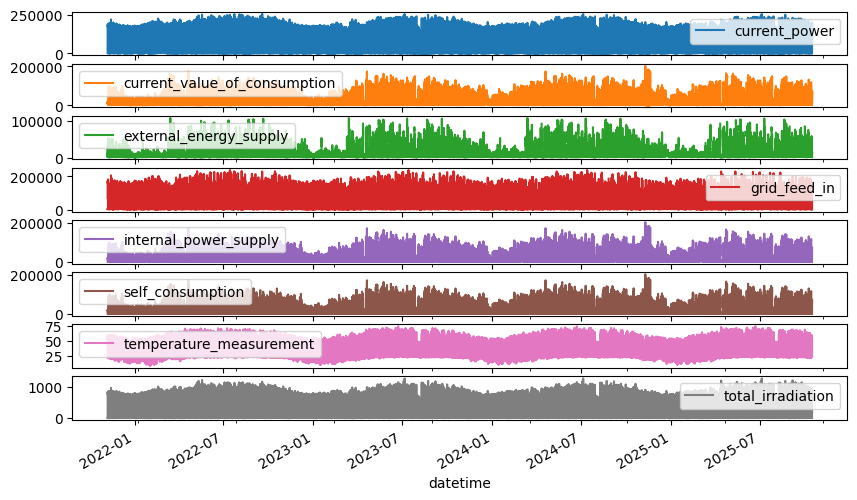

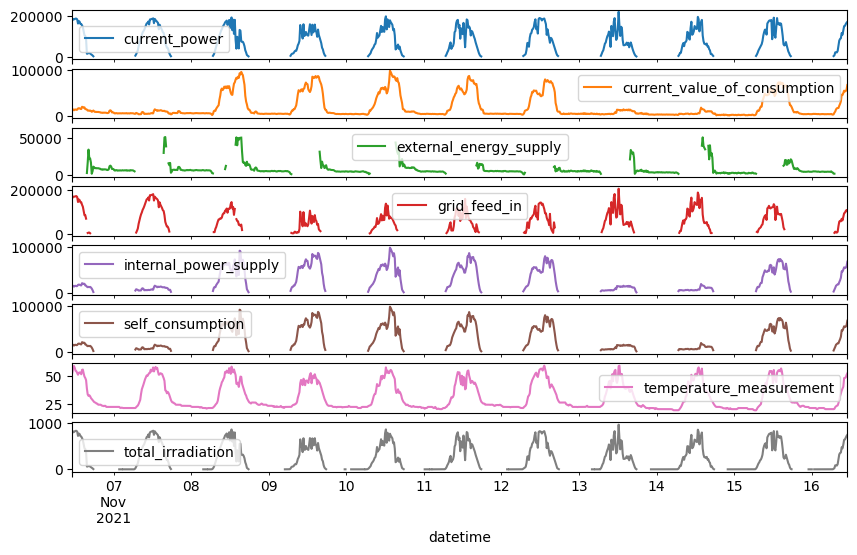

In [24]:
plot_cols = all_cols
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:960]
plot_features.index = df.index[:960]
_ = plot_features.plot(subplots=True)

In [25]:
print("\nจำนวน Missing Values ก่อนทำการ fill:")
for col in all_cols:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"  {col}: {missing_count} missing values")


จำนวน Missing Values ก่อนทำการ fill:
  current_power: 69318 missing values
  current_value_of_consumption: 219 missing values
  external_energy_supply: 48413 missing values
  grid_feed_in: 78628 missing values
  internal_power_supply: 69327 missing values
  self_consumption: 69327 missing values
  temperature_measurement: 197 missing values
  total_irradiation: 47089 missing values
